In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df_original = pd.read_csv("../data/raw/train.csv")
df = df_original.copy()
df.head()

Patient Id  Patient Age Genes in mother's side Inherited from father   
0  PID0x6418          2.0                    Yes                    No  \
1  PID0x25d5          4.0                    Yes                   Yes   
2  PID0x4a82          6.0                    Yes                    No   
3  PID0x4ac8         12.0                    Yes                    No   
4  PID0x1bf7         11.0                    Yes                    No   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name   
0           Yes            No                4.760603            Richard  \
1            No            No                4.910669               Mike   
2            No            No                4.893297           Kimberly   
3           Yes            No                4.705280            Jeffery   
4           NaN           Yes                4.720703            Johanna   

  Family Name Father's name  ...  Birth defects   
0         NaN         Larre  ...            NaN  \
1         NaN        Brycen  ...       Multiple   
2         NaN        Nashon  ...       Singular   
3   Hoelscher        Aayaan  ...       Singular   
4    Stutzman         Suave  ...       Multiple   

   White Blood cell count (thousand per microliter) Blood test result   
0                                          9.857562               NaN  \
1                                          5.522560            normal   
2                                               NaN            normal   
3                                          7.919321      inconclusive   
4                                          4.098210               NaN   

  Symptom 1 Symptom 2 Symptom 3 Symptom 4  Symptom 5   
0       1.0       1.0       1.0       1.0        1.0  \
1       1.0       NaN       1.0       1.0        0.0   
2       0.0       1.0       1.0       1.0        1.0   
3       0.0       0.0       1.0       0.0        0.0   
4       0.0       0.0       0.0       0.0        NaN   

                               Genetic Disorder   
0   Mitochondrial genetic inheritance disorders  \
1                                           NaN   
2  Multifactorial genetic inheritance disorders   
3   Mitochondrial genetic inheritance disorders   
4  Multifactorial genetic inheritance disorders   

                     Disorder Subclass  
0  Leber's hereditary optic neuropathy  
1                      Cystic fibrosis  
2                             Diabetes  
3                       Leigh syndrome  
4                               Cancer  

[5 rows x 45 columns]

In [3]:
df1 = df.drop(["Patient Id", "Patient First Name", "Family Name", "Father's name", "Parental consent", "Institute Name", "Location of Institute"], axis=1)
df1.head()

Patient Age Genes in mother's side Inherited from father Maternal gene   
0          2.0                    Yes                    No           Yes  \
1          4.0                    Yes                   Yes            No   
2          6.0                    Yes                    No            No   
3         12.0                    Yes                    No           Yes   
4         11.0                    Yes                    No           NaN   

  Paternal gene  Blood cell count (mcL)  Mother's age  Father's age    Status   
0            No                4.760603           NaN           NaN     Alive  \
1            No                4.910669           NaN          23.0  Deceased   
2            No                4.893297          41.0          22.0     Alive   
3            No                4.705280          21.0           NaN  Deceased   
4           Yes                4.720703          32.0           NaN     Alive   

  Respiratory Rate (breaths/min)  ... Birth defects   
0                 Normal (30-60)  ...           NaN  \
1                      Tachypnea  ...      Multiple   
2                 Normal (30-60)  ...      Singular   
3                      Tachypnea  ...      Singular   
4                      Tachypnea  ...      Multiple   

   White Blood cell count (thousand per microliter)  Blood test result   
0                                          9.857562                NaN  \
1                                          5.522560             normal   
2                                               NaN             normal   
3                                          7.919321       inconclusive   
4                                          4.098210                NaN   

   Symptom 1  Symptom 2  Symptom 3 Symptom 4 Symptom 5   
0        1.0        1.0        1.0       1.0       1.0  \
1        1.0        NaN        1.0       1.0       0.0   
2        0.0        1.0        1.0       1.0       1.0   
3        0.0        0.0        1.0       0.0       0.0   
4        0.0        0.0        0.0       0.0       NaN   

                               Genetic Disorder   
0   Mitochondrial genetic inheritance disorders  \
1                                           NaN   
2  Multifactorial genetic inheritance disorders   
3   Mitochondrial genetic inheritance disorders   
4  Multifactorial genetic inheritance disorders   

                     Disorder Subclass  
0  Leber's hereditary optic neuropathy  
1                      Cystic fibrosis  
2                             Diabetes  
3                       Leigh syndrome  
4                               Cancer  

[5 rows x 38 columns]

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      16047 non-null  float64
 7   Father's age                                      16097 non-null  float64
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

In [5]:
df1.describe()

Patient Age  Blood cell count (mcL)  Mother's age  Father's age   
count  20656.000000            22083.000000  16047.000000  16097.000000  \
mean       6.974148                4.898871     34.526454     41.972852   
std        4.319475                0.199663      9.852598     13.035501   
min        0.000000                4.092727     18.000000     20.000000   
25%        3.000000                4.763109     26.000000     31.000000   
50%        7.000000                4.899399     35.000000     42.000000   
75%       11.000000                5.033830     43.000000     53.000000   
max       14.000000                5.609829     51.000000     64.000000   

        Test 1   Test 2   Test 3   Test 4   Test 5  No. of previous abortion   
count  19956.0  19931.0  19936.0  19943.0  19913.0              19921.000000  \
mean       0.0      0.0      0.0      1.0      0.0                  2.003062   
std        0.0      0.0      0.0      0.0      0.0                  1.411919   
min        0.0      0.0      0.0      1.0      0.0                  0.000000   
25%        0.0      0.0      0.0      1.0      0.0                  1.000000   
50%        0.0      0.0      0.0      1.0      0.0                  2.000000   
75%        0.0      0.0      0.0      1.0      0.0                  3.000000   
max        0.0      0.0      0.0      1.0      0.0                  4.000000   

       White Blood cell count (thousand per microliter)     Symptom 1   
count                                      19935.000000  19928.000000  \
mean                                           7.486224      0.592483   
std                                            2.653393      0.491385   
min                                            3.000000      0.000000   
25%                                            5.424703      0.000000   
50%                                            7.477132      1.000000   
75%                                            9.526152      1.000000   
max                                           12.000000      1.000000   

          Symptom 2     Symptom 3     Symptom 4     Symptom 5  
count  19861.000000  19982.000000  19970.000000  19930.000000  
mean       0.551886      0.536233      0.497747      0.461917  
std        0.497313      0.498698      0.500007      0.498560  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        1.000000      1.000000      0.000000      0.000000  
75%        1.000000      1.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000      1.000000

In [6]:
df1["Test 1"].unique()

array([ 0., nan])

In [7]:
# Test columns only have either 0 or missing values, not information we could use so these columns were deleted
df1 = df1.drop(["Test 1", "Test 2", "Test 3", "Test 4", "Test 5"], axis=1)

Change column names

In [8]:
df1.columns

Index(['Patient Age', 'Genes in mother's side', 'Inherited from father',
       'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)',
       'Mother's age', 'Father's age', 'Status',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Follow-up',
       'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

In [9]:
df1.rename(columns={"Patient Age": "Patient_Age", "Genes in mother's side": "Mother_inherit", "Inherited from father": "Father_inherit",
                    "Maternal gene": "Maternal_gene", "Paternal gene": "Paternal_gene", "Blood cell count (mcL)": "Blood_cell_count",
                    "Mother's age": "Mother_age", "Father's age": "Father_age", "Respiratory Rate (breaths/min)": "Respiratory_rate",
                    "Heart Rate (rates/min": "Heart_rate", "Follow-up": "Follow_up", "Birth asphyxia": "Birth_asphyxia", "Autopsy shows birth defect (if applicable)": "Autopsy_birth_defect",
                    "Place of birth": "Place_birth", "Folic acid details (peri-conceptional)": "Folic_acid", "H/O serious maternal illness": "Maternal_illness",
                    "H/O radiation exposure (x-ray)": "Radiation_exposure", "H/O substance abuse": "Substance_abuse",
                    "Assisted conception IVF/ART": "Assisted_conception", "History of anomalies in previous pregnancies": "History_previous_pregnancies",
                    "No. of previous abortion": "Number_abortions", "Birth defects": "Birth_defects", "White Blood cell count (thousand per microliter)": "WBC_count",
                    "Blood test result": "Blood_test", 'Symptom 1': 'Symptom1', 'Symptom 2': 'Symptom2', 'Symptom 3': 'Symptom3', 'Symptom 4': 'Symptom4', 'Symptom 5': 'Symptom5',
                    "Genetic Disorder": "Genetic_disorder", "Disorder Subclass": "Disorder_subclass"}, inplace=True)

In [10]:
for col in df1.columns:
    print('\n',col)
    print('There are', df1[col].nunique(), 'unique values, which are:')
    print(df1[col].unique())
    print('----------------------')


 Patient_Age
There are 15 unique values, which are:
[ 2.  4.  6. 12. 11. 14.  3.  7.  1.  0. nan 10.  5. 13.  8.  9.]
----------------------

 Mother_inherit
There are 2 unique values, which are:
['Yes' 'No']
----------------------

 Father_inherit
There are 2 unique values, which are:
['No' 'Yes' nan]
----------------------

 Maternal_gene
There are 2 unique values, which are:
['Yes' 'No' nan]
----------------------

 Paternal_gene
There are 2 unique values, which are:
['No' 'Yes']
----------------------

 Blood_cell_count
There are 22083 unique values, which are:
[4.76060309 4.91066906 4.89329743 ... 5.1864702  4.85854267 4.73806671]
----------------------

 Mother_age
There are 34 unique values, which are:
[nan 41. 21. 32. 40. 45. 44. 50. 28. 30. 24. 36. 51. 23. 49. 46. 18. 38.
 37. 42. 48. 25. 19. 47. 34. 35. 22. 33. 20. 26. 31. 29. 27. 43. 39.]
----------------------

 Father_age
There are 45 unique values, which are:
[nan 23. 22. 63. 44. 42. 56. 20. 24. 57. 48. 30. 55. 62. 43. 3

Replacing missing information

In [11]:
df1["Birth_asphyxia"] = df1["Birth_asphyxia"].replace("No record",np.NaN)
df1["Birth_asphyxia"] = df1["Birth_asphyxia"].replace("Not available",np.NaN)

df1["Autopsy_birth_defect"] = df1["Autopsy_birth_defect"].replace("None",np.NaN)
df1["Autopsy_birth_defect"] = df1["Autopsy_birth_defect"].replace("Not applicable",np.NaN)

df1["Radiation_exposure"] = df1["Radiation_exposure"].replace("-",np.NaN)
df1["Radiation_exposure"] = df1["Radiation_exposure"].replace("Not applicable",np.NaN)

df1["Substance_abuse"] = df1["Substance_abuse"].replace("-",np.NaN)
df1["Substance_abuse"] = df1["Substance_abuse"].replace("Not applicable",np.NaN)

Working with missing values or repeated information

In [12]:
df1.shape

(22083, 33)

In [13]:
df1.isna().sum().sort_values(ascending=False)
# Missing values are present mainly in the following columns: Autopsy_birth_defect, Birth_asphyxia, Radiation_exposure and Substance_abuse.

Autopsy_birth_defect            15475
Birth_asphyxia                  12133
Radiation_exposure              12098
Substance_abuse                 12075
Mother_age                       6036
Father_age                       5986
Maternal_gene                    2810
Symptom2                         2222
Gender                           2173
History_previous_pregnancies     2172
Disorder_subclass                2168
Follow_up                        2166
Number_abortions                 2162
Symptom1                         2155
Birth_defects                    2154
Symptom5                         2153
Maternal_illness                 2152
Respiratory_rate                 2149
WBC_count                        2148
Genetic_disorder                 2146
Blood_test                       2145
Place_birth                      2124
Assisted_conception              2122
Folic_acid                       2117
Heart_rate                       2113
Symptom4                         2113
Symptom3    

In [14]:
# The missing data in each of these columns represent more than half of the rows, so its reasonable to drop them
df1.drop(['Birth_asphyxia','Autopsy_birth_defect','Radiation_exposure','Substance_abuse'], axis=1, inplace=True)

# Maternal/Paternal Gene columns represent the same information as Inherited from Mother/Father columns
# Since Father/Mother inherit columns have less missing information, those will remain in the dataframe
df1.drop(['Maternal_gene', 'Paternal_gene'], axis=1, inplace=True)


In [15]:
df1.duplicated().sum()
# There are no duplicated rows

0

In [16]:
df1[df1["Genetic_disorder"].isna() & df1["Disorder_subclass"].isna()]

Patient_Age Mother_inherit Father_inherit  Blood_cell_count   
80             2.0             No             No          4.940671  \
89            12.0             No             No          5.145456   
240            2.0             No             No          4.590071   
262            1.0            Yes             No          4.835174   
485           14.0            Yes             No          4.793518   
...            ...            ...            ...               ...   
21496          1.0            Yes             No          4.921901   
21565          NaN            Yes            Yes          4.733504   
21645          NaN            Yes            Yes          5.131746   
21701          3.0            Yes            NaN          5.123119   
21777          2.0            Yes            Yes          4.896781   

       Mother_age  Father_age    Status Respiratory_rate   Heart_rate   
80           31.0        43.0  Deceased   Normal (30-60)       Normal  \
89            NaN         NaN     Alive              NaN          NaN   
240           NaN        55.0  Deceased              NaN          NaN   
262          29.0        24.0     Alive   Normal (30-60)  Tachycardia   
485          47.0        40.0  Deceased        Tachypnea       Normal   
...           ...         ...       ...              ...          ...   
21496        23.0        47.0  Deceased        Tachypnea          NaN   
21565        32.0         NaN     Alive   Normal (30-60)          NaN   
21645        27.0         NaN  Deceased   Normal (30-60)       Normal   
21701        42.0         NaN  Deceased   Normal (30-60)       Normal   
21777        40.0        23.0  Deceased        Tachypnea  Tachycardia   

      Follow_up  ... Birth_defects  WBC_count         Blood_test Symptom1   
80          Low  ...           NaN   9.481868       inconclusive      1.0  \
89         High  ...      Singular   4.874626           abnormal      0.0   
240         Low  ...      Multiple   8.298976             normal      1.0   
262         Low  ...      Multiple   9.783686  slightly abnormal      1.0   
485         Low  ...      Multiple   5.647696           abnormal      NaN   
...         ...  ...           ...        ...                ...      ...   
21496       Low  ...      Singular   5.427841       inconclusive      0.0   
21565      High  ...      Multiple   6.483751  slightly abnormal      1.0   
21645      High  ...      Singular   7.477132             normal      NaN   
21701      High  ...      Multiple  11.671116           abnormal      NaN   
21777       Low  ...      Multiple  10.336544       inconclusive      0.0   

      Symptom2 Symptom3  Symptom4 Symptom5  Genetic_disorder Disorder_subclass  
80         NaN      NaN       1.0      1.0               NaN               NaN  
89         1.0      0.0       0.0      1.0               NaN               NaN  
240        0.0      1.0       1.0      0.0               NaN               NaN  
262        1.0      0.0       1.0      1.0               NaN               NaN  
485        1.0      1.0       1.0      0.0               NaN               NaN  
...        ...      ...       ...      ...               ...               ...  
21496      1.0      0.0       0.0      1.0               NaN               NaN  
21565      1.0      1.0       1.0      0.0               NaN               NaN  
21645      1.0      1.0       NaN      1.0               NaN               NaN  
21701      0.0      0.0       1.0      NaN               NaN               NaN  
21777      1.0      1.0       0.0      0.0               NaN               NaN  

[278 rows x 27 columns]

In [17]:
# The aim is to predict the Genetic Disorder and Disorder Subclass a patient has.
# If the patient has no value in the Genetic Disorder and Disorder Subclass columns for the training data, we can assume that the genetic disease is unknown or not present.
# Either way, we can drop the rows with missing values.

df1.dropna(subset=["Genetic_disorder", "Disorder_subclass"], axis=0, inplace=True)
df1.isna().sum().sort_values(ascending=False)

Mother_age                      4457
Father_age                      4418
Symptom2                        1646
History_previous_pregnancies    1614
Symptom5                        1613
WBC_count                       1607
Place_birth                     1591
Assisted_conception             1590
Symptom1                        1578
Follow_up                       1575
Gender                          1573
Respiratory_rate                1570
Symptom4                        1566
Birth_defects                   1565
Blood_test                      1564
Folic_acid                      1564
Maternal_illness                1552
Number_abortions                1546
Symptom3                        1530
Heart_rate                      1528
Patient_Age                     1060
Father_inherit                   220
Mother_inherit                     0
Status                             0
Blood_cell_count                   0
Genetic_disorder                   0
Disorder_subclass                  0
d

Data variation and correlation

In [18]:
numeric_cols = df1.select_dtypes(include=[np.number]).columns
categoric_cols = df1.select_dtypes(exclude=[np.number]).columns

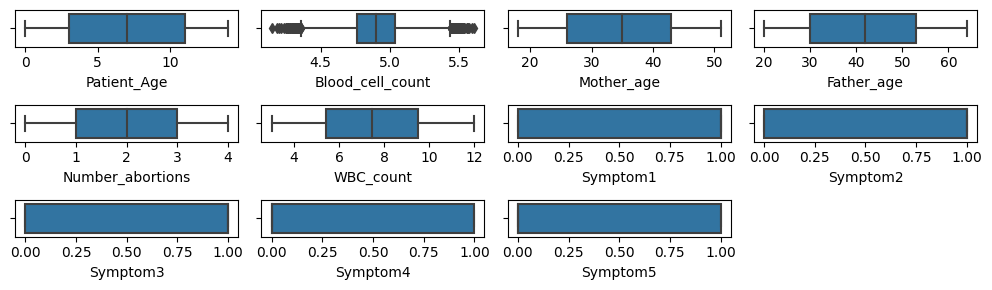

In [19]:
cols = 4
rows = 3
num_cols = df1[numeric_cols].columns
fig = plt.figure(figsize= (10,3))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.boxplot(x=df1[col], ax=ax)
    
fig.tight_layout()  
plt.show()

# Outliers are found only in Blood cell count column but don't seem to affect the distribution.

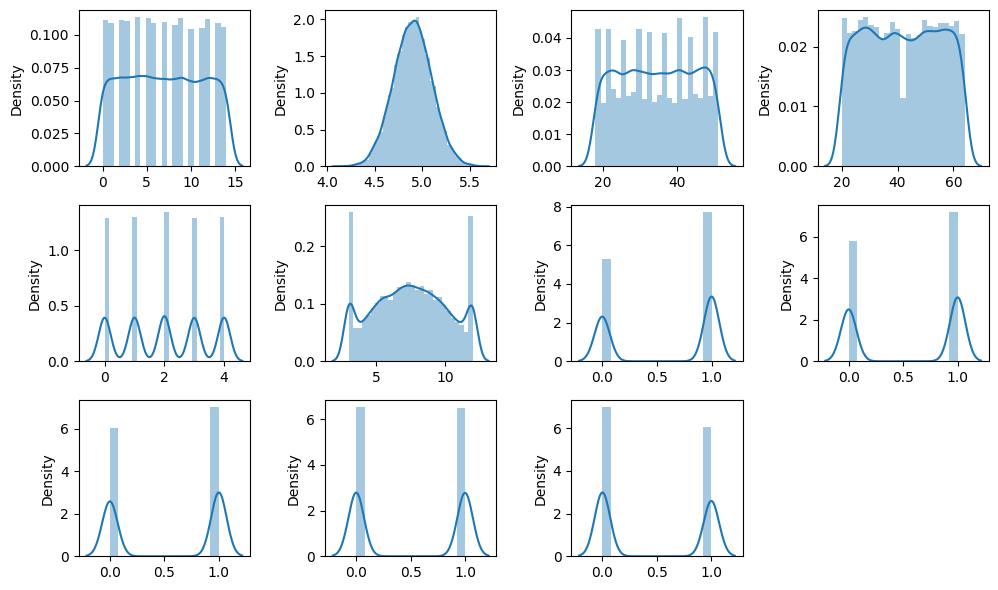

In [20]:
cols = 4
rows = 3
num_cols = df1[numeric_cols].columns
fig = plt.figure(figsize= (10,6))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.distplot(x=df1[col], ax=ax)
    
fig.tight_layout()  
plt.show()

# Symptom columns are boolean. Blood cell count follows a normal distribution. Patient's age and number of abortions have discrete values, as one might expect. 

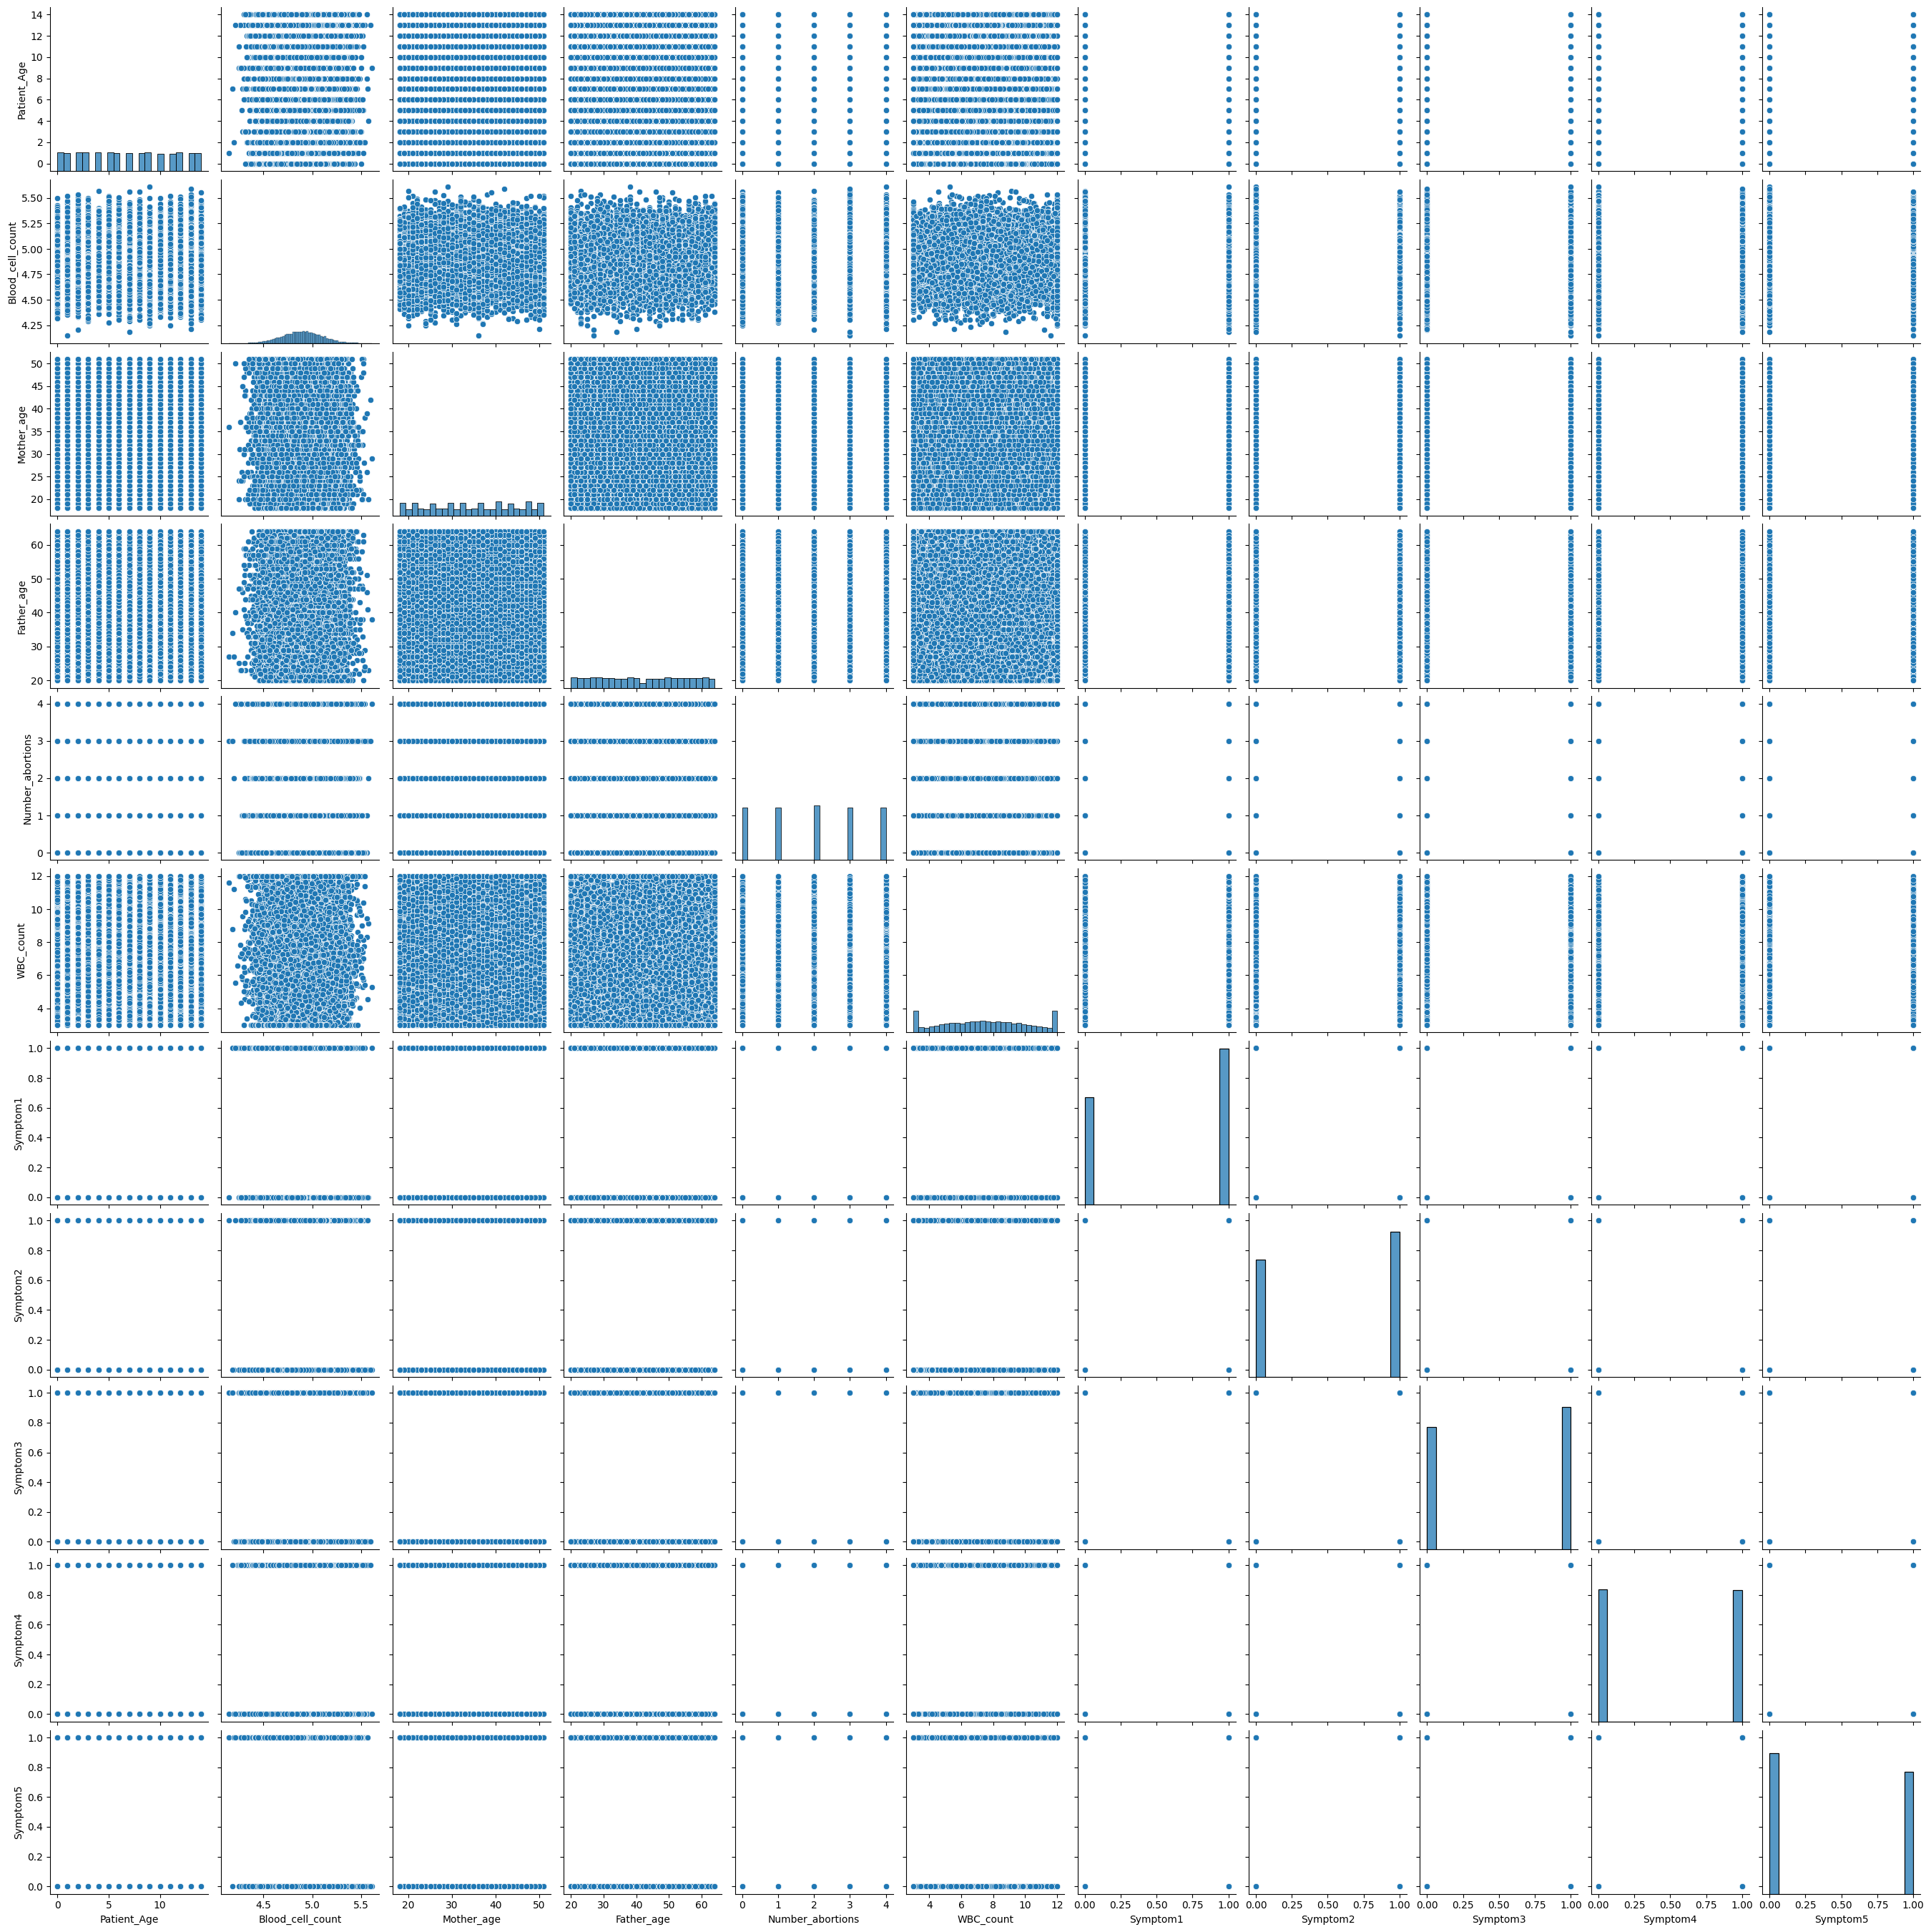

In [21]:
sns.pairplot(df1[numeric_cols]);

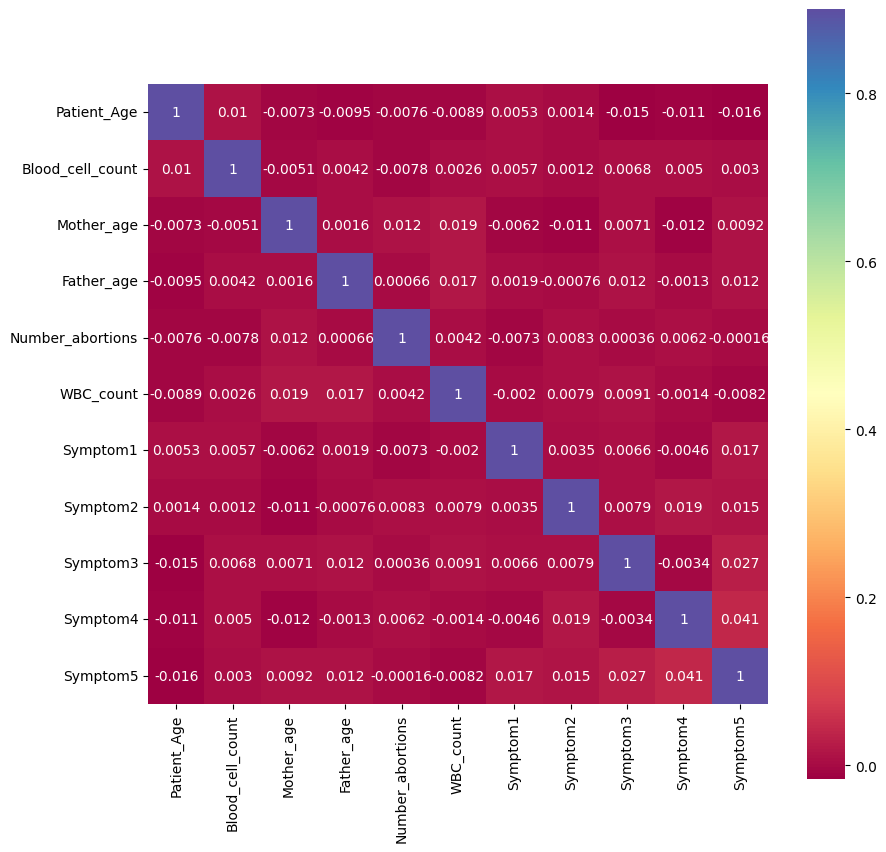

In [22]:
corrmat = df1[numeric_cols].corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmax=0.9, square=True, cmap = 'Spectral', annot = True)

plt.savefig('../images/heatmap.png')

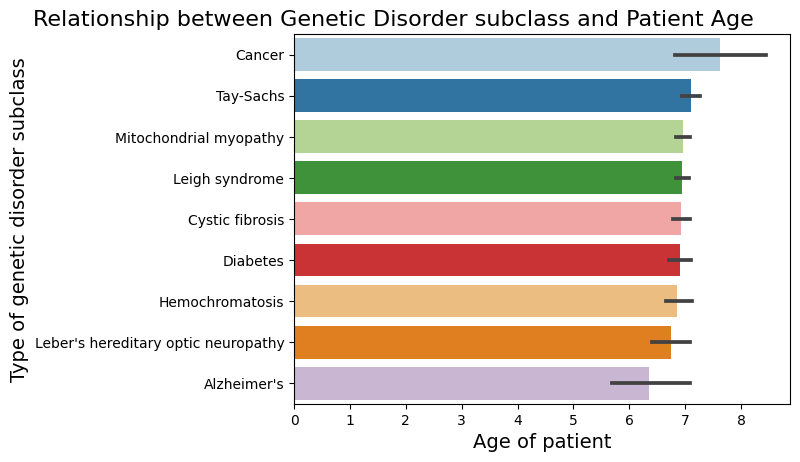

In [43]:
df_bar = df1[['Patient_Age', 'Disorder_subclass']]
result = df_bar.groupby('Disorder_subclass')['Patient_Age'].mean().sort_values(ascending=False)

sns.barplot(data = df_bar, x = 'Patient_Age', y = 'Disorder_subclass',
            palette = 'Paired', order = result.index)
plt.xlabel("Age of patient", size=14)
plt.ylabel("Type of genetic disorder subclass", size=14)
plt.title('Relationship between Genetic Disorder subclass and Patient Age', size=16, x=0.2)

plt.savefig('../images/DisorderSubclass_Age.png')

In [24]:
# Categorical columns
df1["History_previous_pregnancies"].fillna(df1["History_previous_pregnancies"].mode()[0], inplace=True)
df1["Place_birth"].fillna(df1["Place_birth"].mode()[0], inplace=True)
df1["Assisted_conception"].fillna(df1["Assisted_conception"].mode()[0], inplace=True)
df1["Follow_up"].fillna(df1["Follow_up"].mode()[0], inplace=True)
df1["Gender"].fillna(df1["Gender"].mode()[0], inplace=True)
df1["Respiratory_rate"].fillna(df1["Respiratory_rate"].mode()[0], inplace=True)
df1["Birth_defects"].fillna(df1["Birth_defects"].mode()[0], inplace=True)
df1["Folic_acid"].fillna(df1["Folic_acid"].mode()[0], inplace=True)
df1["Blood_test"].fillna(df1["Blood_test"].mode()[0], inplace=True)
df1["Maternal_illness"].fillna(df1["Maternal_illness"].mode()[0], inplace=True)
df1["Heart_rate"].fillna(df1["Heart_rate"].mode()[0], inplace=True)
df1["Father_inherit"].fillna(df1["Father_inherit"].mode()[0], inplace=True)
# Symptom columns are boolean values in integer format, so missing values will be replace by the most frequent value in the column as the rest of the categorical data
df1["Symptom1"].fillna(df1["Symptom1"].mode()[0], inplace=True)
df1["Symptom2"].fillna(df1["Symptom2"].mode()[0], inplace=True)
df1["Symptom3"].fillna(df1["Symptom3"].mode()[0], inplace=True)
df1["Symptom4"].fillna(df1["Symptom4"].mode()[0], inplace=True)
df1["Symptom5"].fillna(df1["Symptom5"].mode()[0], inplace=True)


# Numerical columns
df1["Mother_age"].fillna(df1.groupby(["Disorder_subclass"])["Mother_age"].transform("mean"),inplace=True)
df1["Father_age"].fillna(df1.groupby(["Disorder_subclass"])["Father_age"].transform("mean"),inplace=True)
df1["WBC_count"].fillna(df1.groupby(["Disorder_subclass"])["WBC_count"].transform("mean"),inplace=True)
df1["Patient_Age"].fillna(df1.groupby(["Disorder_subclass"])["Patient_Age"].transform("mean"),inplace=True)
df1["Number_abortions"].fillna(df1.groupby(["Disorder_subclass"])["Number_abortions"].transform("mean"),inplace=True)

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18047 entries, 0 to 22082
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   18047 non-null  float64
 1   Mother_inherit                18047 non-null  object 
 2   Father_inherit                18047 non-null  object 
 3   Blood_cell_count              18047 non-null  float64
 4   Mother_age                    18047 non-null  float64
 5   Father_age                    18047 non-null  float64
 6   Status                        18047 non-null  object 
 7   Respiratory_rate              18047 non-null  object 
 8   Heart_rate                    18047 non-null  object 
 9   Follow_up                     18047 non-null  object 
 10  Gender                        18047 non-null  object 
 11  Place_birth                   18047 non-null  object 
 12  Folic_acid                    18047 non-null  object 
 13  Matern

Use Label Encoder to change categorical values into numeric

In [26]:
le = LabelEncoder()
df2 = df1.copy()
df2[categoric_cols] = df2[categoric_cols].apply(le.fit_transform)
df2 = df2.astype("float32")

# Correlation analysis

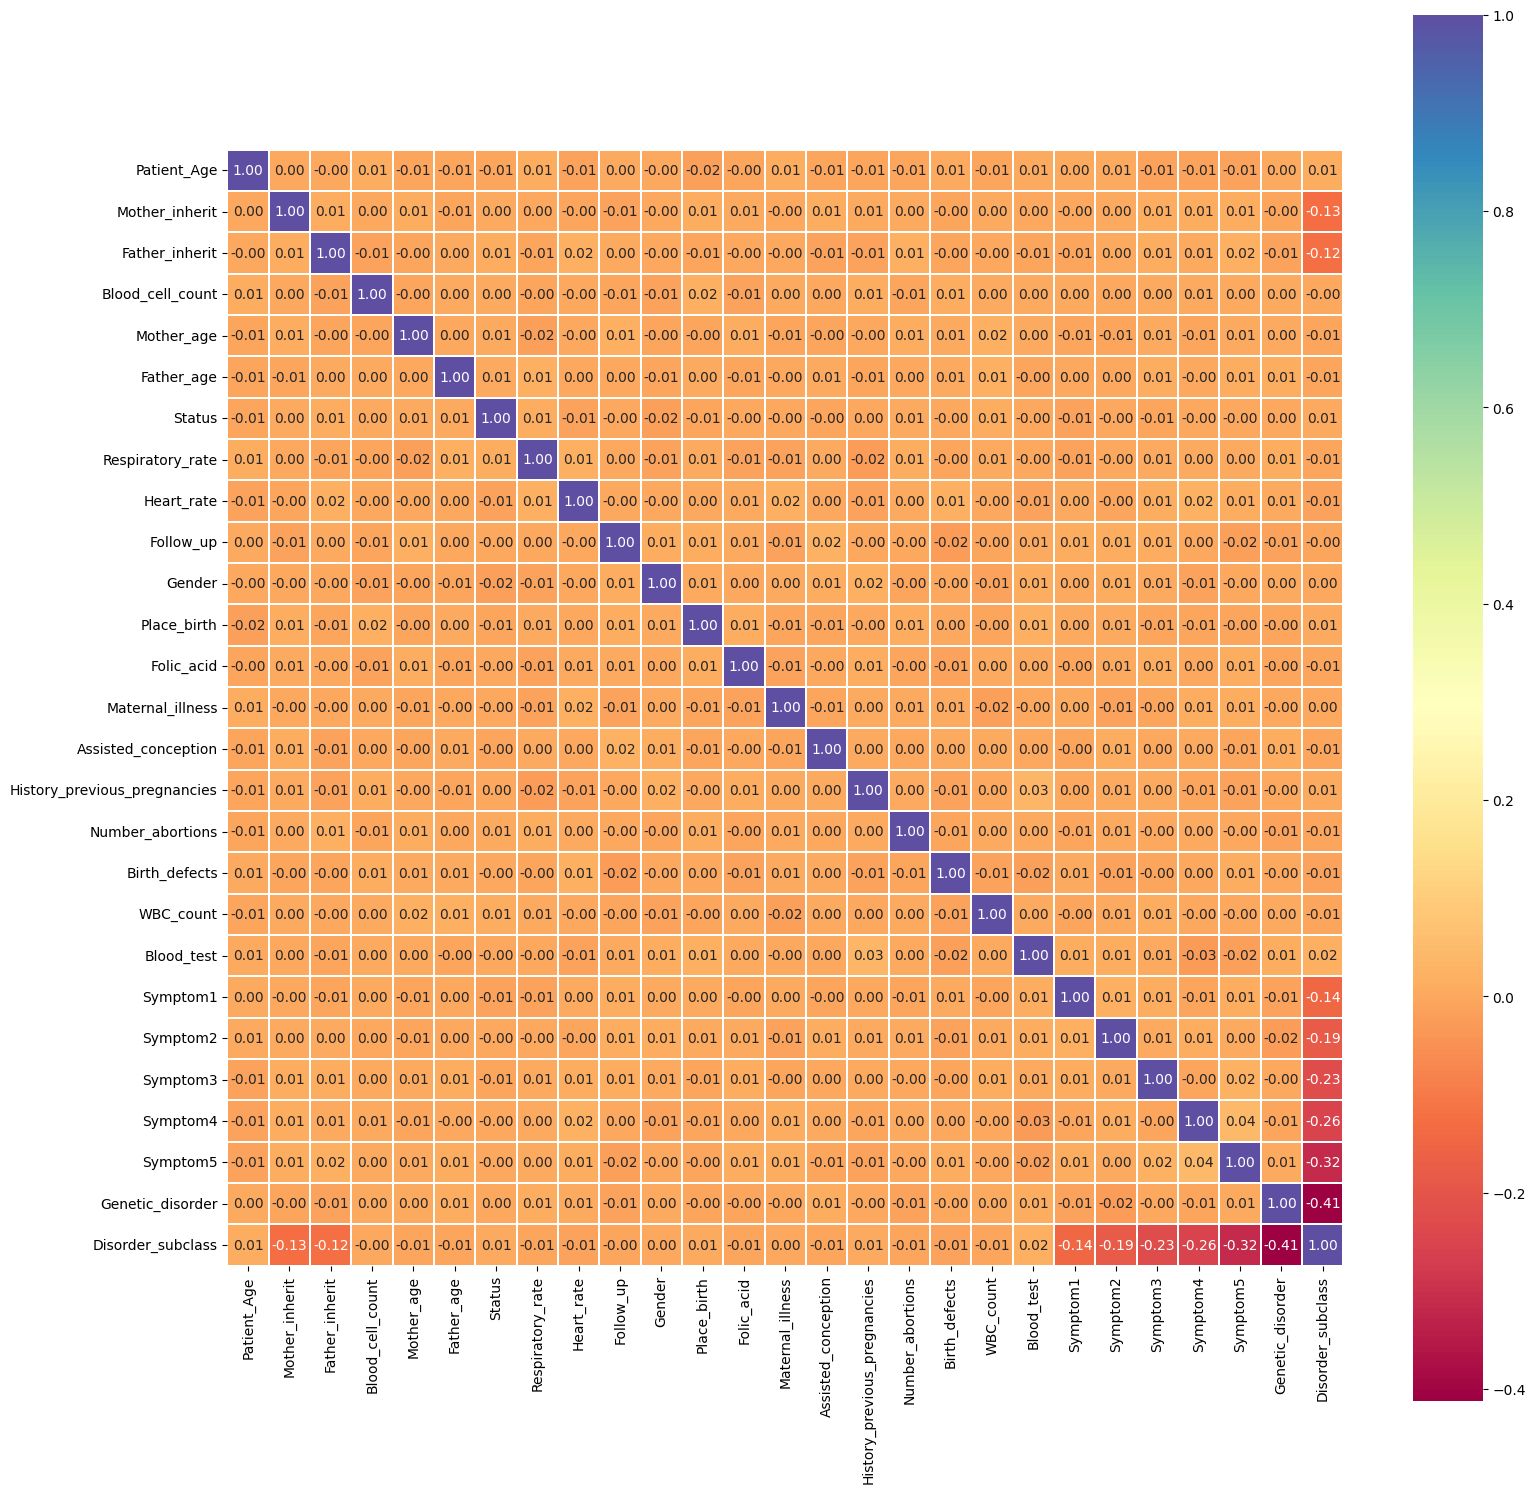

In [28]:
corrmat = df2.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat, vmax=1, linewidths=0.1, square=True, cmap = 'Spectral', annot = True, fmt='.2f')

plt.savefig('../images/heatmap_labelencoder.png')

# Univariate analysis

In [29]:
df2.describe()

Patient_Age  Mother_inherit  Father_inherit  Blood_cell_count   
count  18047.000000    18047.000000    18047.000000      18047.000000  \
mean       6.948785        0.595279        0.390868          4.899198   
std        4.185820        0.490852        0.487958          0.199061   
min        0.000000        0.000000        0.000000          4.146230   
25%        3.000000        0.000000        0.000000          4.764199   
50%        7.000000        1.000000        0.000000          4.900307   
75%       10.000000        1.000000        1.000000          5.033653   
max       14.000000        1.000000        1.000000          5.609829   

         Mother_age    Father_age        Status  Respiratory_rate   
count  18047.000000  18047.000000  18047.000000      18047.000000  \
mean      34.576065     41.971115      0.497922          0.454148   
std        8.524187     11.354011      0.500010          0.497907   
min       18.000000     20.000000      0.000000          0.000000   
25%       29.000000     34.000000      0.000000          0.000000   
50%       34.559017     42.000000      0.000000          0.000000   
75%       40.000000     50.000000      1.000000          1.000000   
max       51.000000     64.000000      1.000000          1.000000   

         Heart_rate     Follow_up  ...  Birth_defects     WBC_count   
count  18047.000000  18047.000000  ...   18047.000000  18047.000000  \
mean       0.450103      0.548401  ...       0.456586      7.475657   
std        0.497518      0.497666  ...       0.498125      2.530353   
min        0.000000      0.000000  ...       0.000000      3.000000   
25%        0.000000      0.000000  ...       0.000000      5.628244   
50%        0.000000      1.000000  ...       0.000000      7.473799   
75%        1.000000      1.000000  ...       1.000000      9.286786   
max        1.000000      1.000000  ...       1.000000     12.000000   

         Blood_test      Symptom1      Symptom2      Symptom3      Symptom4   
count  18047.000000  18047.000000  18047.000000  18047.000000  18047.000000  \
mean       1.648695      0.627584      0.592952      0.576938      0.455699   
std        1.148575      0.483462      0.491298      0.494059      0.498047   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      0.000000      0.000000      0.000000   
50%        2.000000      1.000000      1.000000      1.000000      0.000000   
75%        3.000000      1.000000      1.000000      1.000000      1.000000   
max        3.000000      1.000000      1.000000      1.000000      1.000000   

           Symptom5  Genetic_disorder  Disorder_subclass  
count  18047.000000      18047.000000       18047.000000  
mean       0.422840          0.871890           5.293401  
std        0.494024          0.937886           2.143880  
min        0.000000          0.000000           0.000000  
25%        0.000000          0.000000           3.000000  
50%        0.000000          0.000000           6.000000  
75%        1.000000          2.000000           7.000000  
max        1.000000          2.000000           8.000000  

[8 rows x 27 columns]

In [32]:
print("\n----------- Calculate Mean -----------\n")
print(df2.mean())
 
print("\n----------- Calculate Median -----------\n")
print(df2.median())
 
print("\n----------- Calculate Mode -----------\n")
print(df2.mode())

print("\n----------- Calculate Standard Deviation -----------\n")
print(df2.std())


----------- Calculate Mean -----------

Patient_Age                      6.948785
Mother_inherit                   0.595279
Father_inherit                   0.390868
Maternal_gene                    0.602538
Paternal_gene                    0.432648
Blood_cell_count                 4.899198
Mother_age                      34.576065
Father_age                      41.971115
Status                           0.497922
Respiratory_rate                 0.454148
Heart_rate                       0.450103
Follow_up                        0.548401
Gender                           1.087715
Place_birth                      0.549343
Folic_acid                       0.548568
Maternal_illness                 0.454535
Assisted_conception              0.546573
History_previous_pregnancies     0.548512
Number_abortions                 1.999276
Birth_defects                    0.456586
WBC_count                        7.475657
Blood_test                       1.648695
Symptom1                         0.

Mother_age and Father_age have values in a higher range than other columns.

It can be useful to have all columns in the same range and so a logaritmic transformation can be applied. We can implemented if needed after trying machine learning modeling.

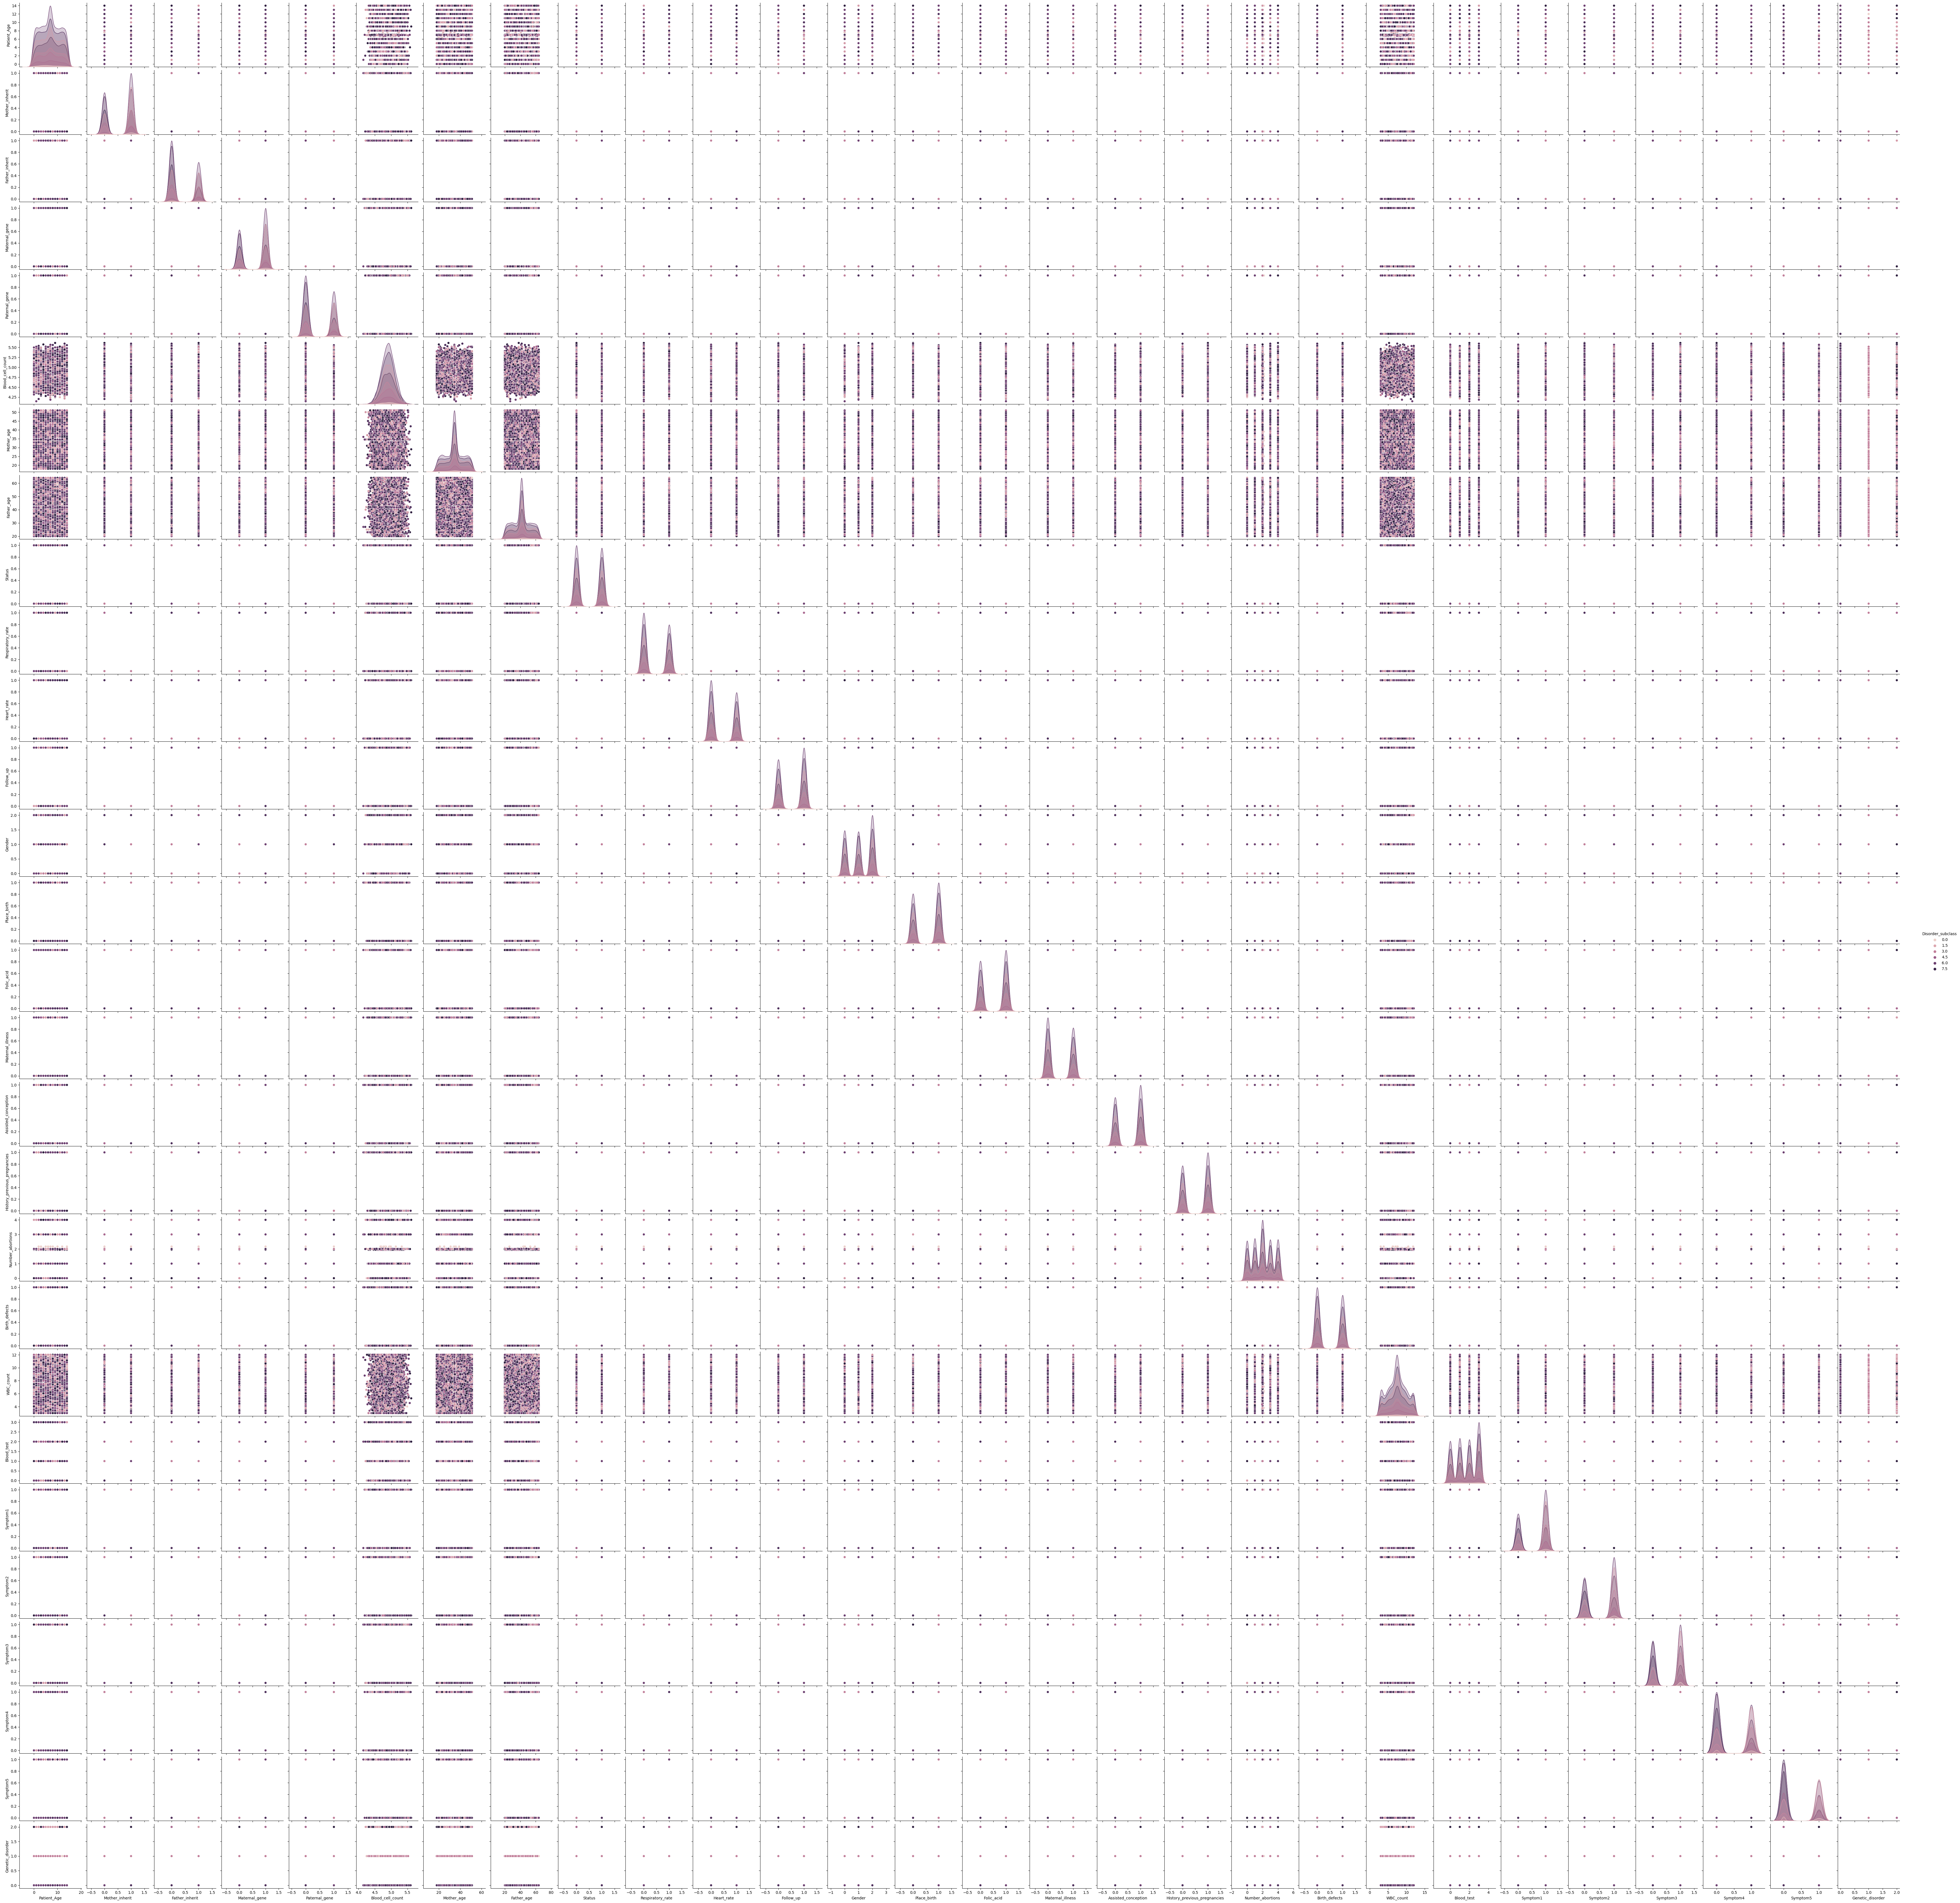

In [33]:
sns.pairplot(df2, hue="Disorder_subclass");

# No clear relationship between the columns is present in the dataset

In [34]:
# Genetic disorder count of unique values
df1['Genetic_disorder'].value_counts()

# Mitochondrial disorder is the most common genetic disorder and multifactorial genetic disorder is a 10% of the total. Data distribution seems unbalanced.

Genetic_disorder
Mitochondrial genetic inheritance disorders     9241
Single-gene inheritance diseases                6929
Multifactorial genetic inheritance disorders    1877
Name: count, dtype: int64

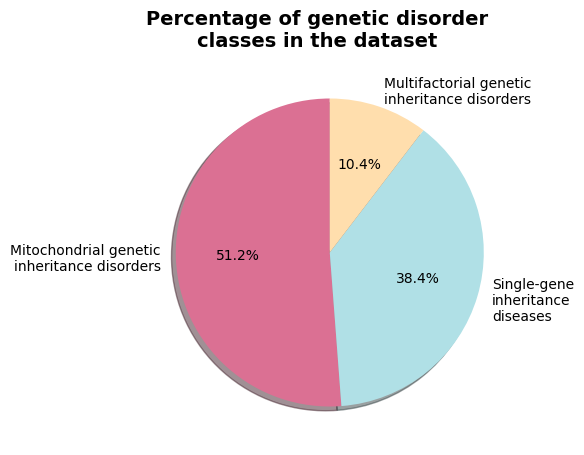

<Figure size 640x480 with 0 Axes>

In [40]:
# Genetic disorder distribution in the dataset
df_pie = df2["Genetic_disorder"].value_counts().reset_index()
df_pie.columns = ["Genetic_disorder", "count"]

fig = plt.figure(figsize=(10,5))
fig.suptitle('Percentage of genetic disorder\nclasses in the dataset', fontsize=14, fontweight='bold', ha='center')
plt.pie(df_pie['count'],labels=['Mitochondrial genetic\ninheritance disorders','Single-gene\ninheritance\ndiseases','Multifactorial genetic\ninheritance disorders'], autopct='%1.1f%%',
        shadow=True, startangle=90, colors=('palevioletred','powderblue','navajowhite'), textprops={'fontsize': 10})
plt.show()

plt.savefig('../images/GenDisorder_pie.png')

In [91]:
# Subclass disorder distribution in the dataset
df_pie2 = df1["Disorder_subclass"].value_counts().reset_index()
df_pie2.columns = ["Disorder_subclass", "count"]

fig = px.pie(df_pie2, values='count', names='Disorder_subclass', title='Percentage of disorder subclasses in the dataset',
        color_discrete_sequence=px.colors.sequential.Plasma, width=700, height=600)
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20), title={'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

plt.savefig('../images/DisorderSubclass_pie.png')

<Figure size 640x480 with 0 Axes>

# Bivariate analysis

In [31]:
df2.columns

Index(['Patient_Age', 'Mother_inherit', 'Father_inherit', 'Blood_cell_count',
       'Mother_age', 'Father_age', 'Status', 'Respiratory_rate', 'Heart_rate',
       'Follow_up', 'Gender', 'Place_birth', 'Folic_acid', 'Maternal_illness',
       'Assisted_conception', 'History_previous_pregnancies',
       'Number_abortions', 'Birth_defects', 'WBC_count', 'Blood_test',
       'Symptom1', 'Symptom2', 'Symptom3', 'Symptom4', 'Symptom5',
       'Genetic_disorder', 'Disorder_subclass'],
      dtype='object')

In [32]:
# Check if according to maternal and paternal associated inheritance there is a difference in the distribution of rows
df2.groupby(["Mother_inherit","Father_inherit"])["Patient_Age"].mean()

Mother_inherit  Father_inherit
0.0             0.0               6.959708
                1.0               6.907774
1.0             0.0               6.949244
                1.0               6.963746
Name: Patient_Age, dtype: float32

In [98]:
# Check if according to maternal and paternal associated genes there is a difference in the distribution of rows
df2.groupby(["Maternal_gene","Paternal_gene"])["Patient_Age"].mean()

Maternal_gene  Paternal_gene
0.0            0.0              6.965698
               1.0              6.924726
1.0            0.0              6.925710
               1.0              6.979152
Name: Patient_Age, dtype: float32

In [99]:
df2.groupby("Genetic_disorder")["Patient_Age"].mean()

Genetic_disorder
0.0    6.937565
1.0    6.903090
2.0    6.976126
Name: Patient_Age, dtype: float32

In [100]:
df2.groupby("Disorder_subclass")["Patient_Age"].mean()

Disorder_subclass
0.0    6.358778
1.0    7.616279
2.0    6.925110
3.0    6.907623
4.0    6.856771
5.0    6.748644
6.0    6.946026
7.0    6.955514
8.0    7.096241
Name: Patient_Age, dtype: float32

In [105]:
df2[df2["Patient_Age"] >= df2["Patient_Age"].mean()]["Disorder_subclass"].value_counts()

Disorder_subclass
6.0    2318
7.0    2199
2.0    1554
8.0    1433
3.0     811
4.0     597
5.0     292
0.0      55
1.0      52
Name: count, dtype: int64

In [33]:
df2.columns

Index(['Patient_Age', 'Mother_inherit', 'Father_inherit', 'Blood_cell_count',
       'Mother_age', 'Father_age', 'Status', 'Respiratory_rate', 'Heart_rate',
       'Follow_up', 'Gender', 'Place_birth', 'Folic_acid', 'Maternal_illness',
       'Assisted_conception', 'History_previous_pregnancies',
       'Number_abortions', 'Birth_defects', 'WBC_count', 'Blood_test',
       'Symptom1', 'Symptom2', 'Symptom3', 'Symptom4', 'Symptom5',
       'Genetic_disorder', 'Disorder_subclass'],
      dtype='object')

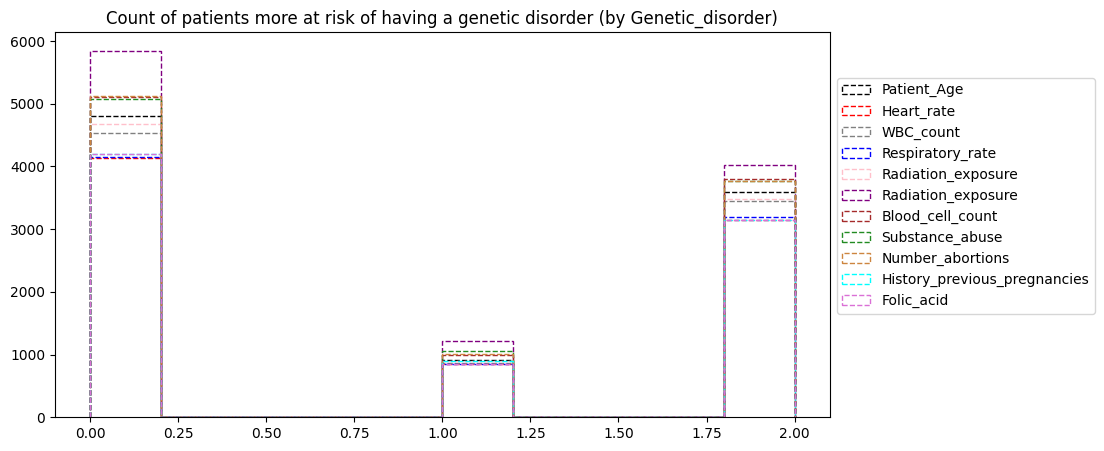

In [34]:
figure = plt.figure(figsize=(10,5))
plt.hist(df2[df2["Patient_Age"] >= df2["Patient_Age"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('black'), histtype='step')
plt.hist(df2[df2["Heart_rate"] >= df2["Heart_rate"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('red'), histtype='step')
plt.hist(df2[df2["WBC_count"] >= df2["WBC_count"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('grey'), histtype='step')
plt.hist(df2[df2["Respiratory_rate"] >= df2["Respiratory_rate"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('blue'), histtype='step')
plt.hist(df2[df2["Blood_cell_count"] >= df2["Blood_cell_count"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('pink'), histtype='step')
plt.hist(df2[df2["Number_abortions"] >= df2["Number_abortions"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('purple'), histtype='step')
plt.hist(df2[df2["History_previous_pregnancies"] >= df2["History_previous_pregnancies"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('brown'), histtype='step')
plt.hist(df2[df2["Folic_acid"] >= df2["Folic_acid"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('forestgreen'), histtype='step')
plt.hist(df2[df2["Follow_up"] >= df2["Follow_up"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('peru'), histtype='step')
plt.hist(df2[df2["Birth_defects"] >= df2["Birth_defects"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('cyan'), histtype='step')
plt.hist(df2[df2["Maternal_illness"] >= df2["Maternal_illness"].mean()]["Genetic_disorder"], linestyle=('dashed'), color=('orchid'), histtype='step')

labels = ['Patient_Age', 'Heart_rate', 'WBC_count', 'Respiratory_rate', 'Radiation_exposure', 'Radiation_exposure', 'Blood_cell_count',
          'Substance_abuse', 'Number_abortions', 'History_previous_pregnancies', 'Folic_acid', 'Follow_up', 'Birth_defects', 'Maternal_illness']
plt.legend(labels, bbox_to_anchor=(1, 0.9))
plt.title("Count of patients more at risk of having a genetic disorder (by Genetic_disorder)", size=12)
plt.show()

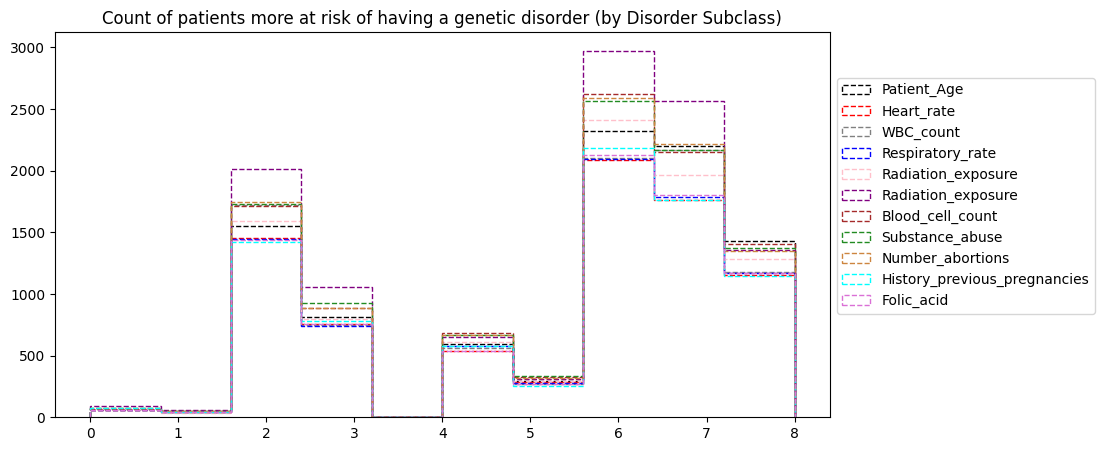

In [35]:
figure = plt.figure(figsize=(10,5))
plt.hist(df2[df2["Patient_Age"] >= df2["Patient_Age"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('black'), histtype='step')
plt.hist(df2[df2["Heart_rate"] >= df2["Heart_rate"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('red'), histtype='step')
plt.hist(df2[df2["WBC_count"] >= df2["WBC_count"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('grey'), histtype='step')
plt.hist(df2[df2["Respiratory_rate"] >= df2["Respiratory_rate"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('blue'), histtype='step')
plt.hist(df2[df2["Blood_cell_count"] >= df2["Blood_cell_count"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('pink'), histtype='step')
plt.hist(df2[df2["Number_abortions"] >= df2["Number_abortions"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('purple'), histtype='step')
plt.hist(df2[df2["History_previous_pregnancies"] >= df2["History_previous_pregnancies"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('brown'), histtype='step')
plt.hist(df2[df2["Folic_acid"] >= df2["Folic_acid"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('forestgreen'), histtype='step')
plt.hist(df2[df2["Follow_up"] >= df2["Follow_up"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('peru'), histtype='step')
plt.hist(df2[df2["Birth_defects"] >= df2["Birth_defects"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('cyan'), histtype='step')
plt.hist(df2[df2["Maternal_illness"] >= df2["Maternal_illness"].mean()]["Disorder_subclass"], linestyle=('dashed'), color=('orchid'), histtype='step')

labels = ['Patient_Age', 'Heart_rate', 'WBC_count', 'Respiratory_rate', 'Radiation_exposure', 'Radiation_exposure', 'Blood_cell_count',
          'Substance_abuse', 'Number_abortions', 'History_previous_pregnancies', 'Folic_acid', 'Follow_up', 'Birth_defects', 'Maternal_illness']
plt.legend(labels, bbox_to_anchor=(1, 0.9))
plt.title("Count of patients more at risk of having a genetic disorder (by Disorder Subclass)", size=12)
plt.show()

In [37]:
hemo = (df1[df1['Disorder_subclass']=="Hemochromatosis"][['Symptom1','Symptom2','Symptom3','Symptom4','Symptom5']]==1).sum().to_frame().rename(columns={0:'Hemochromatosis'})
leber = (df1[df1['Disorder_subclass']=="Leber's hereditary optic neuropathy"][['Symptom1','Symptom2','Symptom3','Symptom4','Symptom5']]==1).sum().to_frame().rename(columns={0 : "Leber's hereditary optic neuropathy"})
diabetes = (df1[df1['Disorder_subclass']=='Diabetes'][['Symptom1','Symptom2','Symptom3','Symptom4','Symptom5']]==1).sum().to_frame().rename(columns={0 : 'Diabetes'})
leigh = (df1[df1['Disorder_subclass']=='Leigh syndrome'][['Symptom1','Symptom2','Symptom3','Symptom4','Symptom5']]==1).sum().to_frame().rename(columns={0 : 'Leigh syndrome'})
cancer = (df1[df1['Disorder_subclass']=='Cancer'][['Symptom1','Symptom2','Symptom3','Symptom4','Symptom5']]==1).sum().to_frame().rename(columns={0 : 'Cancer'})
cystic = (df1[df1['Disorder_subclass']=='Cystic fibrosis'][['Symptom1','Symptom2','Symptom3','Symptom4','Symptom5']]==1).sum().to_frame().rename(columns={0 : 'Cystic fibrosis'})
tay = (df1[df1['Disorder_subclass']=='Tay-Sachs'][['Symptom1','Symptom2','Symptom3','Symptom4','Symptom5']]==1).sum().to_frame().rename(columns={0 : 'Tay-Sachs'})
mitomyo = (df1[df1['Disorder_subclass']=='Mitochondrial myopathy'][['Symptom1','Symptom2','Symptom3','Symptom4','Symptom5']]==1).sum().to_frame().rename(columns={0 : 'Mitochondrial myopathy'})
alzh = (df1[df1['Disorder_subclass']=="Alzheimer's"][['Symptom1','Symptom2','Symptom3','Symptom4','Symptom5']]==1).sum().to_frame().rename(columns={0 : "Alzheimer's"})

symptom_wise = pd.concat([hemo,leber,diabetes,leigh,cancer,cystic,tay,mitomyo,alzh], axis=1).transpose()
symptom_wise

Symptom1  Symptom2  Symptom3  Symptom4   
Hemochromatosis                           538       440       378       180  \
Leber's hereditary optic neuropathy       507       514       516       499   
Diabetes                                 1301      1320      1379      1214   
Leigh syndrome                           2912      2811      2729      2071   
Cancer                                     22        15        22         2   
Cystic fibrosis                          2323      2299      2348      2055   
Tay-Sachs                                1307      1108      1041       646   
Mitochondrial myopathy                   2299      2070      1871      1435   
Alzheimer's                               117       124       128       122   

                                     Symptom5  
Hemochromatosis                           132  
Leber's hereditary optic neuropathy       500  
Diabetes                                 1252  
Leigh syndrome                           1918  
Cancer                                      1  
Cystic fibrosis                          2066  
Tay-Sachs                                 465  
Mitochondrial myopathy                   1173  
Alzheimer's                               124

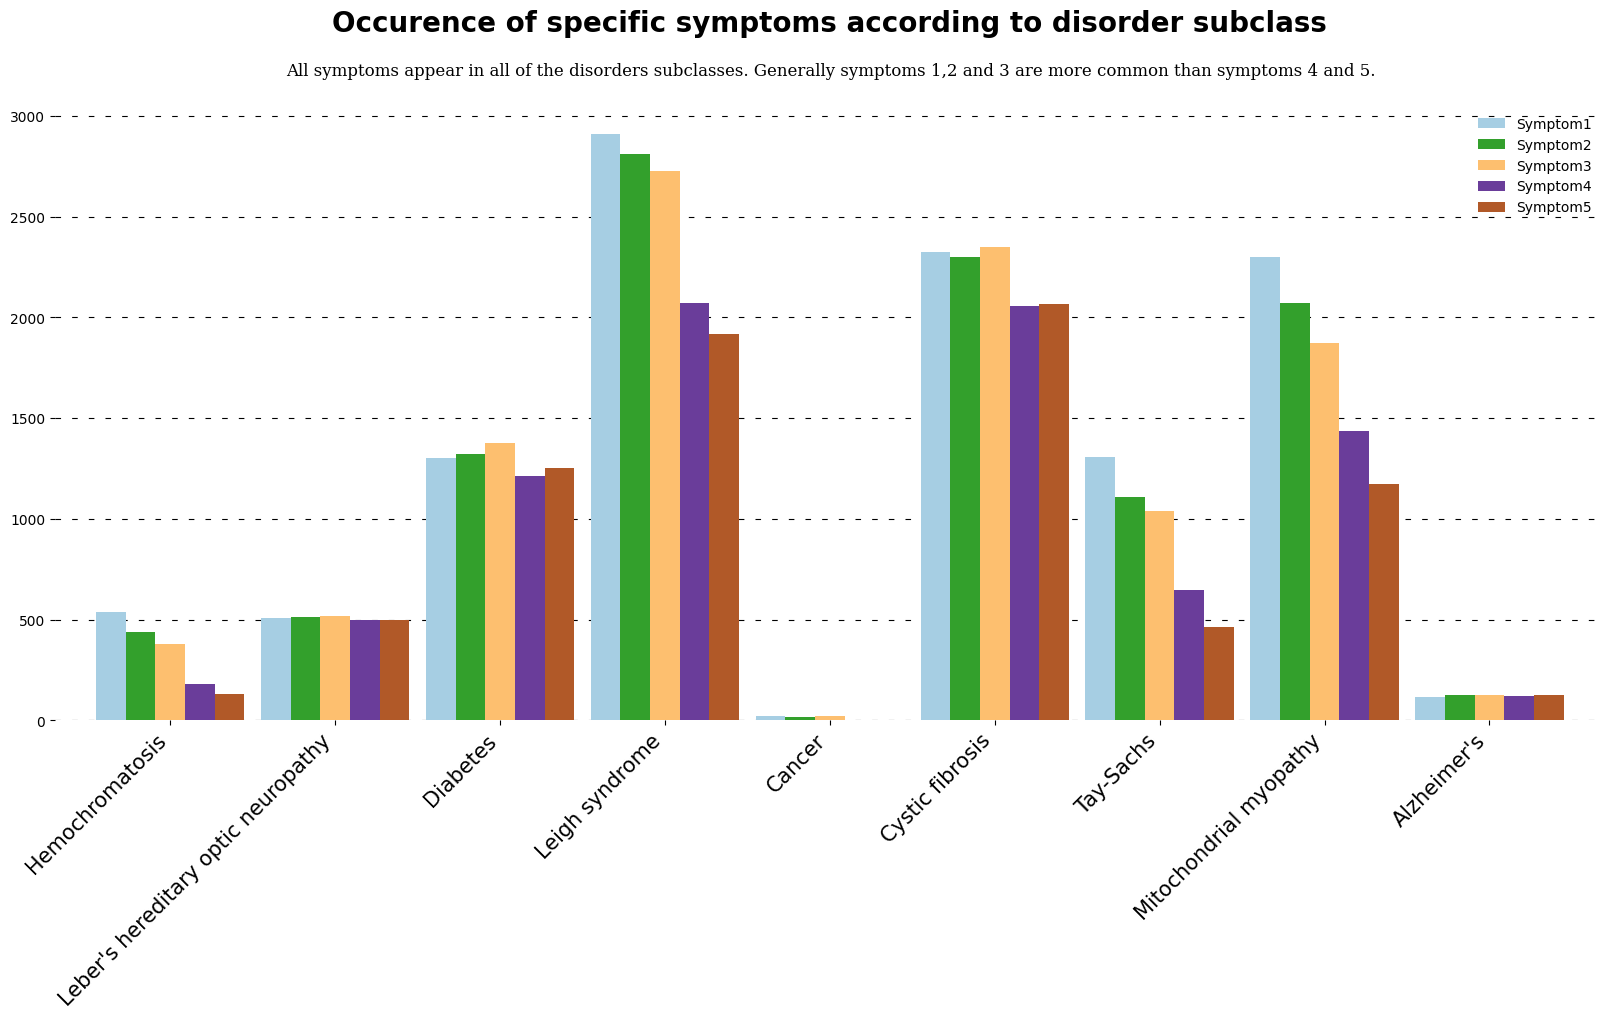

In [38]:
plt.rcParams['figure.frameon']= False
symptom_wise.plot.bar(figsize=(20,8),colormap = 'Paired', fontsize=10,width=0.9,zorder=2)
plt.title('Occurence of specific symptoms according to disorder subclass\n\n', fontsize=20,fontweight='bold',ha='center')
plt.xticks(
    rotation=45, horizontalalignment='right',
    fontweight='light', fontsize=15,
)
plt.grid(color='black', linestyle=':', axis='y', zorder=1,  dashes=(5,10))
plt.box(False)
plt.legend(loc='best',frameon=False)    
plt.text(0.7,3200,'All symptoms appear in all of the disorders subclasses. Generally symptoms 1,2 and 3 are more common than symptoms 4 and 5.',fontsize=12, fontfamily='serif')
plt.savefig('../images/DisorderSubclass_Symptoms.png')

## Save dataset

In [39]:
df2.to_csv("../data/processed/df_eda.csv", index=False)